In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import cv2

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [2]:
csv_path = 'D:/data_m2n.csv'
data = pd.read_csv(csv_path)
data.head()

,file_name,w,s,a,d,wa,wd,sa,sd,nk
0,D:/data_m2n/20190214_134152_613005.npy,1,0,0,0,0,0,0,0,0
1,D:/data_m2n/20190214_134152_650903.npy,0,0,0,0,0,1,0,0,0
2,D:/data_m2n/20190214_134152_687776.npy,0,0,0,0,0,1,0,0,0
3,D:/data_m2n/20190214_134152_726671.npy,0,0,0,0,0,1,0,0,0
4,D:/data_m2n/20190214_134152_759093.npy,0,0,0,0,0,1,0,0,0


No key 116682


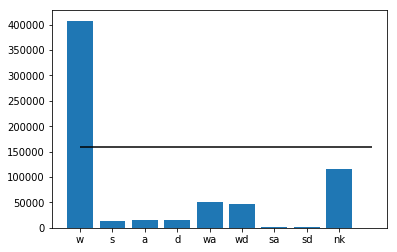

In [7]:
samples_per_bar = 160000
_keys = ["w", "s", "a", "d", "wa", "wd", "sa", "sd", "nk"]
_x = []
_y = []
for k in _keys:
    _x.append(k)
    _y.append(data[k].value_counts()[1])
    
plt.bar(_x, _y)
plt.hlines(samples_per_bar, 0, len(_keys))
print("No key", data["nk"].value_counts()[1])

In [8]:
print('total data:', len(data))
print('total "w" data:', data["w"].value_counts()[1])
index_to_remove = data[data["w"] == 1].index
index_to_remove = shuffle(index_to_remove)[samples_per_bar:]
print('removed "w" data: ', len(index_to_remove))
data.drop(data.index[index_to_remove], inplace=True)
print('remaining "w" data:', data["w"].value_counts()[1])
print('remaining:', len(data))

total data: 672848
total "w" data: 407693
removed "w" data:  247693
remaining "w" data: 160000
remaining: 425155


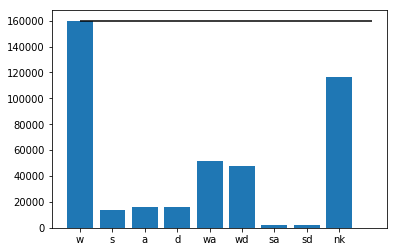

In [9]:
_keys = ["w", "s", "a", "d", "wa", "wd", "sa", "sd", "nk"]
_x = []
_y = []
for k in _keys:
    _x.append(k)
    _y.append(data[k].value_counts()[1])
    
plt.bar(_x, _y)
plt.hlines(samples_per_bar, 0, len(_keys))

In [14]:
X_train, X_valid, y_train, y_valid = train_test_split(data["file_name"], data.drop(["file_name"], axis=1), test_size=0.04)
print("X_train shape", X_train.shape)
print("X_valid shape", X_valid.shape)

X_train shape (408148,)
X_valid shape (17007,)


In [15]:
def img_preprocess(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    img = img / 255
    return img

Text(0.5, 1.0, 'Preprocess image')

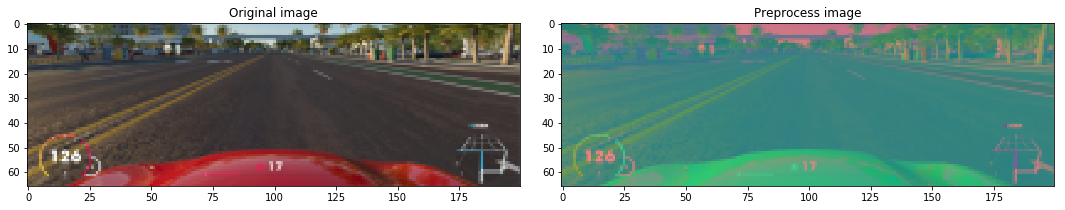

In [16]:
image = X_train.iloc[random.randint(0, len(X_train) - 1)]
original_image = cv2.cvtColor(np.load(image), cv2.COLOR_BGR2RGB)
preprocess_image = img_preprocess(original_image)

fig, axis = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axis[0].imshow(original_image)
axis[0].set_title("Original image")
axis[1].imshow(preprocess_image)
axis[1].set_title("Preprocess image")

In [17]:
data.to_pickle('./data_clean/clean_25.pkl')

In [18]:
pickle_data = pd.read_pickle('./data_clean/clean_25.pkl')

In [19]:
pickle_data.head()

,file_name,w,s,a,d,wa,wd,sa,sd,nk
1,D:/data_m2n/20190214_134152_650903.npy,0,0,0,0,0,1,0,0,0
2,D:/data_m2n/20190214_134152_687776.npy,0,0,0,0,0,1,0,0,0
3,D:/data_m2n/20190214_134152_726671.npy,0,0,0,0,0,1,0,0,0
4,D:/data_m2n/20190214_134152_759093.npy,0,0,0,0,0,1,0,0,0
5,D:/data_m2n/20190214_134152_793002.npy,0,0,0,0,0,1,0,0,0
